In [1]:
from regexmodel import RegexModel
import re
import numpy as np
from faker import Faker
import polars as pl
from matplotlib import pyplot as plt

20 {'failed': 17, 'success': 83, 'n_tot_char': 754, 'n_char_success': 635, 'n_parameters': 11, 'avg_log_like_per_char': -2.564381705611052, 'avg_log_like_pc_success': -1.7504266580029284, 'n_fake': 100, 'threshold': 0.2, 'success_rate': 0.83}
10 {'failed': 0, 'success': 100, 'n_tot_char': 754, 'n_char_success': 754, 'n_parameters': 10, 'avg_log_like_per_char': -1.7430868946211824, 'avg_log_like_pc_success': -1.7430868946211824, 'n_fake': 100, 'threshold': 0.1, 'success_rate': 1.0}
5 {'failed': 0, 'success': 100, 'n_tot_char': 754, 'n_char_success': 754, 'n_parameters': 10, 'avg_log_like_per_char': -1.7430868946211824, 'avg_log_like_pc_success': -1.7430868946211824, 'n_fake': 100, 'threshold': 0.05, 'success_rate': 1.0}
2 {'failed': 0, 'success': 100, 'n_tot_char': 754, 'n_char_success': 754, 'n_parameters': 10, 'avg_log_like_per_char': -1.7430868946211824, 'avg_log_like_pc_success': -1.7430868946211824, 'n_fake': 100, 'threshold': 0.02, 'success_rate': 1.0}
1 {'failed': 0, 'success': 1

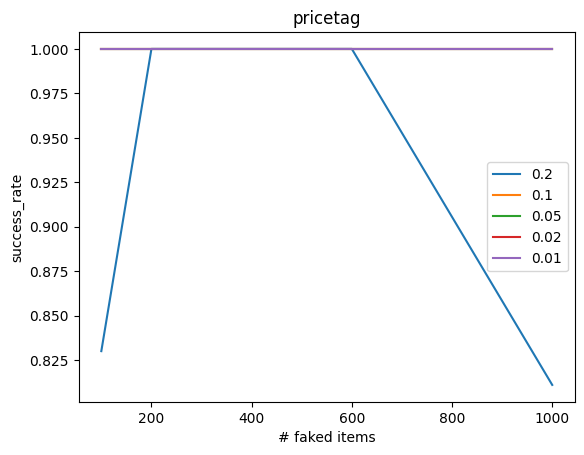

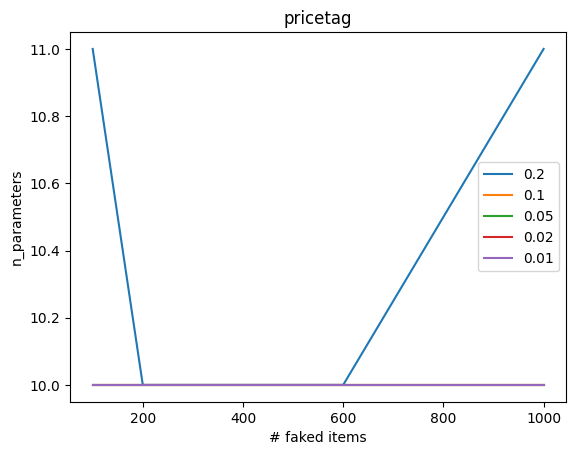

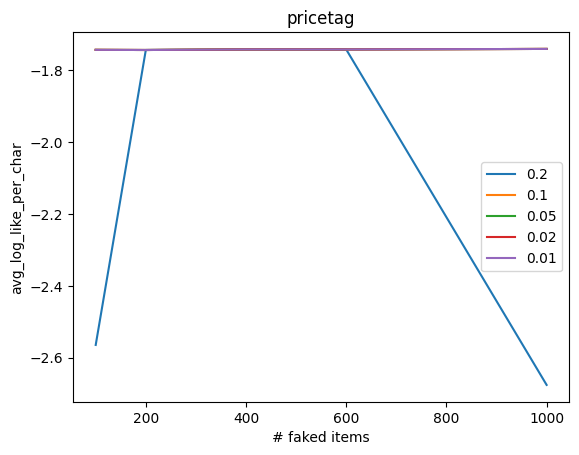

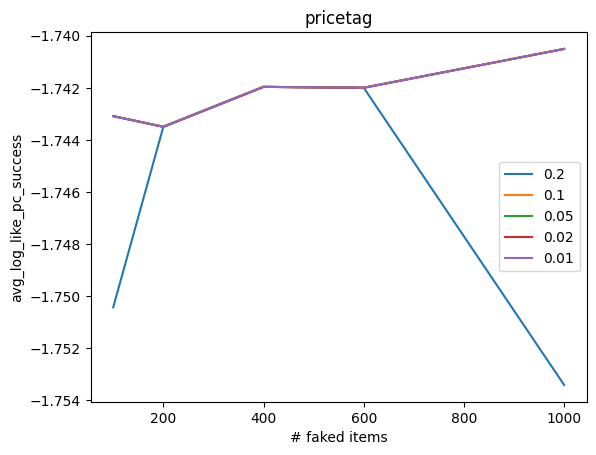

In [6]:
def plot_fit(faker_type, rel_thres, n_fake, locale="NL"):
    fake = Faker(locale=locale)
    fake_data = []
    fake_data_2 = []
    # fake_data = [getattr(fake, faker_type)() for _ in range(n_fake)]
    # fake_data_2 = [getattr(fake, faker_type)() for _ in range(n_fake)]

    all_res = []
    for cur_n_fake in n_fake:
        for cur_rel_thres in rel_thres:
            counts = round(cur_rel_thres*cur_n_fake)
            while len(fake_data) < cur_n_fake:
                fake_data.append(getattr(fake, faker_type)())
                fake_data_2.append(getattr(fake, faker_type)())
            model = RegexModel.fit(fake_data[:cur_n_fake], counts)
            stats = model.fit_statistics(fake_data_2[:cur_n_fake])
            success_rate = stats["success"]/(stats["success"] + stats["failed"])
            stats.update({"n_fake": cur_n_fake, "threshold": cur_rel_thres, "success_rate": success_rate})
            print(counts, stats)
            all_res.append(stats)

    for res_name in ["success_rate", "n_parameters", "avg_log_like_per_char", "avg_log_like_pc_success"]:
        for threshold in rel_thres:
            sub_stats = [res for res in all_res if res["threshold"] == threshold]
            n_fake = [res["n_fake"] for res in sub_stats]
            y_data = [res[res_name] for res in sub_stats]
            plt.plot(n_fake, y_data, label=str(threshold))
        plt.ylabel(res_name)
        plt.xlabel("# faked items")
        plt.title(faker_type)
        plt.legend()
        plt.show()
        
rel_thres = [0.2, 0.1, 0.05, 0.02, 0.01]
n_fake = [100, 200, 400, 600, 1000]
plot_fit("pricetag", rel_thres, n_fake)

In [3]:
plot_fit("phone_number", count_thres)

NameError: name 'count_thres' is not defined

In [ ]:
plot_fit("pricetag", count_thres)

{'failed': 0, 'success': 1000, 'n_tot_char': 7384, 'n_char_success': 7384, 'n_parameters': 10, 'avg_log_like_per_char': -1.7422512025810317, 'avg_log_like_pc_success': -1.7422512025810317}
{'failed': 0, 'success': 1000, 'n_tot_char': 7384, 'n_char_success': 7384, 'n_parameters': 10, 'avg_log_like_per_char': -1.7422512025810317, 'avg_log_like_pc_success': -1.7422512025810317}
{'failed': 0, 'success': 1000, 'n_tot_char': 7384, 'n_char_success': 7384, 'n_parameters': 10, 'avg_log_like_per_char': -1.7422512025810317, 'avg_log_like_pc_success': -1.7422512025810317}


In [ ]:
plot_fit("timezone", count_thres)

{'failed': 48, 'success': 952, 'n_tot_char': 14114, 'n_char_success': 13224, 'n_parameters': 106, 'avg_log_like_per_char': -2.1189551742998507, 'avg_log_like_pc_success': -1.7966599464438862}
{'failed': 108, 'success': 892, 'n_tot_char': 14114, 'n_char_success': 12137, 'n_parameters': 67, 'avg_log_like_per_char': -2.51495592125265, 'avg_log_like_pc_success': -1.799411360798574}
{'failed': 286, 'success': 714, 'n_tot_char': 14114, 'n_char_success': 9587, 'n_parameters': 47, 'avg_log_like_per_char': -3.4250616792358235, 'avg_log_like_pc_success': -1.7805270045668133}


In [ ]:
plot_fit("mime_type", count_thres)

{'failed': 152, 'success': 848, 'n_tot_char': 13561, 'n_char_success': 10925, 'n_parameters': 146, 'avg_log_like_per_char': -2.948355517395221, 'avg_log_like_pc_success': -1.9930257442562627}
{'failed': 171, 'success': 829, 'n_tot_char': 13561, 'n_char_success': 10550, 'n_parameters': 132, 'avg_log_like_per_char': -3.0896108524396753, 'avg_log_like_pc_success': -1.9999015758217245}
{'failed': 480, 'success': 520, 'n_tot_char': 13561, 'n_char_success': 6709, 'n_parameters': 66, 'avg_log_like_per_char': -4.6875023482440605, 'avg_log_like_pc_success': -2.4199254990239343}


In [ ]:
plot_fit("unix_partition", count_thres)

{'failed': 0, 'success': 1000, 'n_tot_char': 9347, 'n_char_success': 9347, 'n_parameters': 19, 'avg_log_like_per_char': -0.7124422581375679, 'avg_log_like_pc_success': -0.7124422581375679}
{'failed': 0, 'success': 1000, 'n_tot_char': 9347, 'n_char_success': 9347, 'n_parameters': 19, 'avg_log_like_per_char': -0.7124422581375679, 'avg_log_like_pc_success': -0.7124422581375679}
{'failed': 0, 'success': 1000, 'n_tot_char': 9347, 'n_char_success': 9347, 'n_parameters': 19, 'avg_log_like_per_char': -0.7124422581375679, 'avg_log_like_pc_success': -0.7124422581375679}


In [ ]:
plot_fit("ascii_email", count_thres)

{'failed': 82, 'success': 918, 'n_tot_char': 22083, 'n_char_success': 19706, 'n_parameters': 148, 'avg_log_like_per_char': -2.9500200493370037, 'avg_log_like_pc_success': -2.4726255176782903}
{'failed': 154, 'success': 846, 'n_tot_char': 22083, 'n_char_success': 18019, 'n_parameters': 106, 'avg_log_like_per_char': -3.297136768083693, 'avg_log_like_pc_success': -2.4827989231260688}
{'failed': 369, 'success': 631, 'n_tot_char': 22083, 'n_char_success': 12889, 'n_parameters': 65, 'avg_log_like_per_char': -4.300345827215551, 'avg_log_like_pc_success': -2.4404247705360174}


In [ ]:
plot_fit("isbn10", count_thres)

{'failed': 0, 'success': 1000, 'n_tot_char': 13000, 'n_char_success': 13000, 'n_parameters': 13, 'avg_log_like_per_char': -1.6547767285606847, 'avg_log_like_pc_success': -1.6547767285606847}
{'failed': 0, 'success': 1000, 'n_tot_char': 13000, 'n_char_success': 13000, 'n_parameters': 13, 'avg_log_like_per_char': -1.6547767285606847, 'avg_log_like_pc_success': -1.6547767285606847}
{'failed': 26, 'success': 974, 'n_tot_char': 13000, 'n_char_success': 12662, 'n_parameters': 19, 'avg_log_like_per_char': -1.7936253965038587, 'avg_log_like_pc_success': -1.6571085823925258}


In [ ]:
plot_fit("job", count_thres)

{'failed': 75, 'success': 925, 'n_tot_char': 20743, 'n_char_success': 18171, 'n_parameters': 390, 'avg_log_like_per_char': -3.4101853136432525, 'avg_log_like_pc_success': -2.9151245051653603}
{'failed': 268, 'success': 732, 'n_tot_char': 20743, 'n_char_success': 13651, 'n_parameters': 140, 'avg_log_like_per_char': -4.3601337348877784, 'avg_log_like_pc_success': -3.036587328711121}
{'failed': 443, 'success': 557, 'n_tot_char': 20743, 'n_char_success': 9623, 'n_parameters': 47, 'avg_log_like_per_char': -5.120895641080885, 'avg_log_like_pc_success': -3.056063554053725}


In [ ]:
plot_fit("ssn", count_thres)

{'failed': 0, 'success': 1000, 'n_tot_char': 9000, 'n_char_success': 9000, 'n_parameters': 4, 'avg_log_like_per_char': -2.3025850929940663, 'avg_log_like_pc_success': -2.3025850929940663}
{'failed': 0, 'success': 1000, 'n_tot_char': 9000, 'n_char_success': 9000, 'n_parameters': 4, 'avg_log_like_per_char': -2.3025850929940663, 'avg_log_like_pc_success': -2.3025850929940663}
{'failed': 0, 'success': 1000, 'n_tot_char': 9000, 'n_char_success': 9000, 'n_parameters': 4, 'avg_log_like_per_char': -2.3025850929940663, 'avg_log_like_pc_success': -2.3025850929940663}


In [ ]:
plot_fit("user_agent", count_thres)

{'failed': 604, 'success': 396, 'n_tot_char': 92155, 'n_char_success': 27391, 'n_parameters': 2972, 'avg_log_like_per_char': -4.953068136079467, 'avg_log_like_pc_success': -0.33135450302653574}
{'failed': 787, 'success': 213, 'n_tot_char': 92155, 'n_char_success': 13539, 'n_parameters': 1416, 'avg_log_like_per_char': -5.941684703593827, 'avg_log_like_pc_success': -0.33206771897661896}
{'failed': 1000, 'success': 0, 'n_tot_char': 92155, 'n_char_success': 0, 'n_parameters': 428, 'avg_log_like_per_char': -6.907755278982204, 'avg_log_like_pc_success': 0.0}


In [ ]:
plot_fit("color", count_thres)

{'failed': 28, 'success': 972, 'n_tot_char': 7000, 'n_char_success': 6804, 'n_parameters': 40, 'avg_log_like_per_char': -2.805546915349666, 'avg_log_like_pc_success': -2.6873763040516097}
{'failed': 52, 'success': 948, 'n_tot_char': 7000, 'n_char_success': 6636, 'n_parameters': 34, 'avg_log_like_per_char': -2.92422917003473, 'avg_log_like_pc_success': -2.7057235184890884}
{'failed': 160, 'success': 840, 'n_tot_char': 7000, 'n_char_success': 5880, 'n_parameters': 26, 'avg_log_like_per_char': -3.3724918838120734, 'avg_log_like_pc_success': -2.699108379970132}


In [ ]:
plot_fit("license_plate", count_thres)

{'failed': 0, 'success': 1000, 'n_tot_char': 8000, 'n_char_success': 8000, 'n_parameters': 27, 'avg_log_like_per_char': -2.3992459358405154, 'avg_log_like_pc_success': -2.3992459358405154}
{'failed': 0, 'success': 1000, 'n_tot_char': 8000, 'n_char_success': 8000, 'n_parameters': 27, 'avg_log_like_per_char': -2.3992459358405154, 'avg_log_like_pc_success': -2.3992459358405154}
{'failed': 0, 'success': 1000, 'n_tot_char': 8000, 'n_char_success': 8000, 'n_parameters': 27, 'avg_log_like_per_char': -2.3992459358405154, 'avg_log_like_pc_success': -2.3992459358405154}


In [ ]:
plot_fit("iban", count_thres)

{'failed': 0, 'success': 1000, 'n_tot_char': 18000, 'n_char_success': 18000, 'n_parameters': 8, 'avg_log_like_per_char': -2.259078181556378, 'avg_log_like_pc_success': -2.259078181556378}
{'failed': 0, 'success': 1000, 'n_tot_char': 18000, 'n_char_success': 18000, 'n_parameters': 8, 'avg_log_like_per_char': -2.259078181556378, 'avg_log_like_pc_success': -2.259078181556378}
{'failed': 0, 'success': 1000, 'n_tot_char': 18000, 'n_char_success': 18000, 'n_parameters': 8, 'avg_log_like_per_char': -2.259078181556378, 'avg_log_like_pc_success': -2.259078181556378}


In [ ]:
plot_fit("company", count_thres)

{'failed': 166, 'success': 834, 'n_tot_char': 15370, 'n_char_success': 11787, 'n_parameters': 230, 'avg_log_like_per_char': -3.739256731241143, 'avg_log_like_pc_success': -2.7760998383459055}
{'failed': 328, 'success': 672, 'n_tot_char': 15370, 'n_char_success': 9116, 'n_parameters': 111, 'avg_log_like_per_char': -4.56330167900706, 'avg_log_like_pc_success': -2.9548974650706508}
{'failed': 482, 'success': 518, 'n_tot_char': 15370, 'n_char_success': 6342, 'n_parameters': 49, 'avg_log_like_per_char': -5.359036079777148, 'avg_log_like_pc_success': -3.154394495036836}


In [ ]:
plot_fit("time", count_thres)

{'failed': 0, 'success': 1000, 'n_tot_char': 8000, 'n_char_success': 8000, 'n_parameters': 12, 'avg_log_like_per_char': -1.5684362084126884, 'avg_log_like_pc_success': -1.5684362084126884}
{'failed': 0, 'success': 1000, 'n_tot_char': 8000, 'n_char_success': 8000, 'n_parameters': 12, 'avg_log_like_per_char': -1.5684362084126884, 'avg_log_like_pc_success': -1.5684362084126884}
{'failed': 0, 'success': 1000, 'n_tot_char': 8000, 'n_char_success': 8000, 'n_parameters': 12, 'avg_log_like_per_char': -1.5684362084126884, 'avg_log_like_pc_success': -1.5684362084126884}


In [ ]:
plot_fit("ipv4", count_thres)

{'failed': 0, 'success': 1000, 'n_tot_char': 13211, 'n_char_success': 13211, 'n_parameters': 10, 'avg_log_like_per_char': -1.779706031682854, 'avg_log_like_pc_success': -1.779706031682854}
{'failed': 0, 'success': 1000, 'n_tot_char': 13211, 'n_char_success': 13211, 'n_parameters': 10, 'avg_log_like_per_char': -1.779706031682854, 'avg_log_like_pc_success': -1.779706031682854}
{'failed': 0, 'success': 1000, 'n_tot_char': 13211, 'n_char_success': 13211, 'n_parameters': 10, 'avg_log_like_per_char': -1.779706031682854, 'avg_log_like_pc_success': -1.779706031682854}


In [ ]:
plot_fit("uri", count_thres)

{'failed': 233, 'success': 767, 'n_tot_char': 33132, 'n_char_success': 23021, 'n_parameters': 545, 'avg_log_like_per_char': -3.393713433959844, 'avg_log_like_pc_success': -1.8503192679800542}
{'failed': 361, 'success': 639, 'n_tot_char': 33132, 'n_char_success': 18111, 'n_parameters': 195, 'avg_log_like_per_char': -4.100396622499083, 'avg_log_like_pc_success': -1.7720141820467281}
{'failed': 643, 'success': 357, 'n_tot_char': 33132, 'n_char_success': 8587, 'n_parameters': 103, 'avg_log_like_per_char': -5.566621636245009, 'avg_log_like_pc_success': -1.733137851339418}


In [ ]:
plot_fit("name", count_thres)

{'failed': 135, 'success': 865, 'n_tot_char': 17177, 'n_char_success': 14103, 'n_parameters': 188, 'avg_log_like_per_char': -3.680168739822194, 'avg_log_like_pc_success': -2.9766587758870102}
{'failed': 293, 'success': 707, 'n_tot_char': 17177, 'n_char_success': 10749, 'n_parameters': 97, 'avg_log_like_per_char': -4.491425081167427, 'avg_log_like_pc_success': -3.0464375928844922}
{'failed': 469, 'success': 531, 'n_tot_char': 17177, 'n_char_success': 7467, 'n_parameters': 52, 'avg_log_like_per_char': -5.237007236478068, 'avg_log_like_pc_success': -3.0643859035846934}
